# Data Analysis of Covid-19 Data
## By : Sanchana Mohankumar

In [ ]:
# Installations
!pip install glove-python-binary
!pip3 install glove_py
!pip install "gensim==3.8.1"
!pip install glove==1.0.0
!pip install tensorflow
!pip install texthero
!pip install tqdm
!pip install keras
!pip install emoji

In [ ]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 197 kB 5.0 MB/s 
  Created wheel for emoji: filename=emoji-2.0.0-py3-none-any.whl size=193022 sha256=8c051b947c7f097b7f7e5a0297fafc36b4d15b6aacb2cd6086cee44e964559a1
  Stored in directory: /root/.cache/pip/wheels/ec/29/4d/3cfe7452ac7d8d83b1930f8a6205c3c9649b24e80f9029fc38
Successfully built emoji


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Libraries

In [ ]:
from collections import Counter
from scipy import spatial
from numpy import array
from numpy import asarray
from numpy import zeros
import pandas as pd 
import numpy as np
import gensim
import logging
import string
import re 

import warnings
warnings.filterwarnings("ignore")

#library to remove emoji
from emoji import demojize


from urllib.request import urlopen

#libraries for plots
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns

#nltk libraries
import nltk
nltk.download('omw-1.4')

#extracting punctuation and adding to list
from string import punctuation 
#Custom Punctuation
custom_punc = ',“”"!#$%&\'()*+-\./:;<=>?@[\\]^_`{|}~—ー‘’•–'

#word and sentence tokenize
import nltk.data
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tokenize import WordPunctTokenizer  # tokenizes punctuation also
tokenizer = nltk.data.load('tokenizers/punkt/PY3/english.pickle') #sentence tokenizer
from keras.preprocessing.text import text_to_word_sequence # tokenizes and removes punctuation

#Downloading nltk stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from gensim.parsing.preprocessing import remove_stopwords

#Stemming
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

#Lemmatizing
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

#Tokenizer
from keras.preprocessing.text import Tokenizer





---



# Load Data

#### Training dataset

In [ ]:
#Load the tweet training set
covid_train = pd.read_csv("/content/drive/MyDrive/Covid_data_fake_news/Constraint_Train.csv") 
covid_train.head(2)

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real


#### Validation dataset

In [ ]:
#Load the tweet validation set
covid_valid = pd.read_csv("/content/drive/MyDrive/Covid_data_fake_news/Constraint_Val.csv") 
covid_valid.head(2)

,id,tweet,label
0,1,Chinese converting to Islam after realising th...,fake
1,2,11 out of 13 people (from the Diamond Princess...,fake


#### Test dataset

In [ ]:
#Load the tweet Test set
covid_test = pd.read_csv("/content/drive/MyDrive/Covid_data_fake_news/english_test_with_labels.csv") 
covid_test.head(2)

,id,tweet,label
0,1,Our daily update is published. States reported...,real
1,2,Alfalfa is the only cure for COVID-19.,fake




---



# Exploratory Data Analysis 
### Balance of fake and real news data 
As we know real tweets are tweets released by verified organization like cdc, government websites whereas fake ones are posted by people where it mostly carries information about personal opinion, assumptions and wrong info. So, here we have both real and fake tweets. In the below plot we are checking the distribution of labelled tweets in order to avoid bias or overfitting

- Training dataset shows around 3360 real tweets and 3060 fake tweets 
- Validation dataset shows around 1120 real tweets and 1020 fake tweets 

We can see that the dataset is well balanced 

[Text(0.5, 1.0, 'Training Tweet data')]

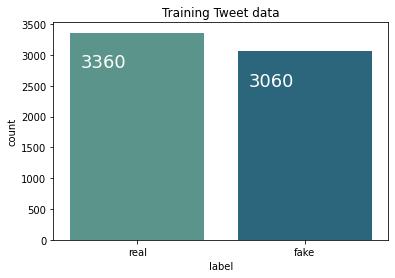

In [ ]:
ax = sns.countplot(x = 'label', data = covid_train, palette = 'crest')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
    
ax.set(title = "Training Tweet data")    

[Text(0.5, 1.0, 'Validation Tweet data')]

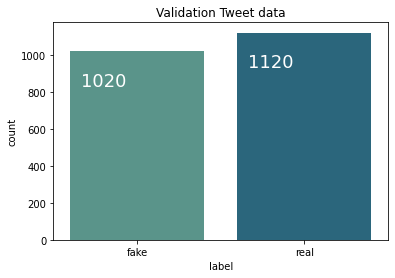

In [ ]:
bx = sns.countplot(x = 'label', data = covid_valid, palette = 'crest')
for p in bx.patches:
    bx.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
bx.set(title = "Validation Tweet data")

[Text(0.5, 1.0, 'Test Tweet data')]

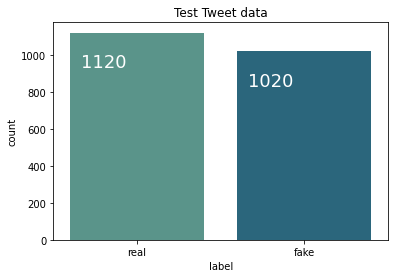

In [ ]:
ax = sns.countplot(x = 'label', data = covid_test, palette = 'crest')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=18)
    
ax.set(title = "Test Tweet data")

# World Cloud of Fake and Real news data
Analyzing key words in the dataset to know the most talked topics and words used 

In [ ]:
df_total = pd.concat([covid_train, covid_valid, covid_test])

In [ ]:
df_real = df_total[df_total.label == 'real']
df_fake = df_total[df_total.label == 'fake']

In [ ]:
def word_cloud(df):
           comment_words = ''
           stopwords = set(STOPWORDS)

           # iterate through the csv file
           for val in df:
           # typecaste each val to string
                   val = str(val)
 
           # split the value
           tokens = val.split()
     
           # Converts each token into lowercase
           for i in range(len(tokens)):
                 tokens[i] = tokens[i].lower()
     
           comment_words += " ".join(tokens)+" "
 
           wordcloud = WordCloud(width = 800, height = 800,
                       background_color ='black',
                       stopwords = stopwords,
                       min_font_size = 10).generate(comment_words)
 
           # plot the WordCloud image                      
           plt.figure(figsize = (6, 6), facecolor = 'White')
           plt.imshow(wordcloud)
           plt.axis("off")
           plt.tight_layout(pad = 0)
 
           plt.show()


Real News 

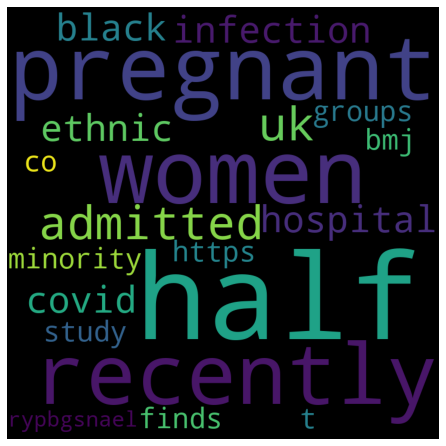

In [ ]:
word_cloud(df_real.tweet)

Fake News

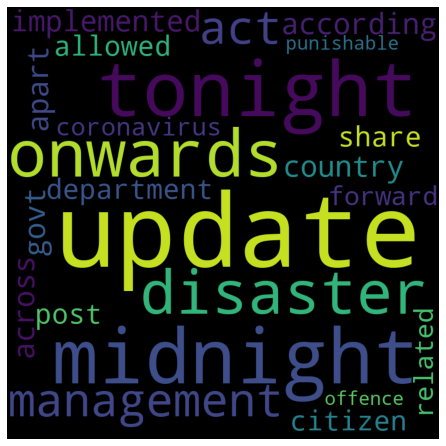

In [ ]:
word_cloud(df_fake.tweet)

###  Covid19 tweet missing data
https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/
- In the below code we are checking for any missing data in both Training and validation dataset.The purpose of checking for missing data is because they can lead to bias in results of machine learning model and reduce the accuracy.
As we can see there is no missing value in our dataset no further steps to take 

In [ ]:
covid_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      6420 non-null   int64 
 1   tweet   6420 non-null   object
 2   label   6420 non-null   object
dtypes: int64(1), object(2)
memory usage: 150.6+ KB


In [ ]:
covid_valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2140 non-null   int64 
 1   tweet   2140 non-null   object
 2   label   2140 non-null   object
dtypes: int64(1), object(2)
memory usage: 50.3+ KB


In [ ]:
covid_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2140 non-null   int64 
 1   tweet   2140 non-null   object
 2   label   2140 non-null   object
dtypes: int64(1), object(2)
memory usage: 50.3+ KB


### Statistics
Some basic statistics to get insight about our training and validation dataset

In [ ]:
#Training dataset
print(pd.DataFrame(covid_train.describe()))
#Validation dataset
print(pd.DataFrame(covid_valid.describe()))
#Test dataset
print(pd.DataFrame(covid_test.describe()))

                id
count  6420.000000
mean   3210.500000
std    1853.438696
min       1.000000
25%    1605.750000
50%    3210.500000
75%    4815.250000
max    6420.000000
                id
count  2140.000000
mean   1070.500000
std     617.909109
min       1.000000
25%     535.750000
50%    1070.500000
75%    1605.250000
max    2140.000000
                id
count  2140.000000
mean   1070.500000
std     617.909109
min       1.000000
25%     535.750000
50%    1070.500000
75%    1605.250000
max    2140.000000




---






# Data Preprocessing
Data preprocessing, a component of data preparation, describes any type of processing performed on raw data to prepare it for another data processing procedure. It's considered as the preliminary step for the data mining process. The steps performed are listed below 

- Lowering words 
- Used Regular expressions to remove various parameters like Numbers, hyperlinks, dash 
- Stop words removal 
- Removed punctuation using custom list 
- Removed emojis 
- Word Tokenize and sentence Tokenize 
- Lemmatization 

In [31]:
class covid19tweet:
    
    def __init__(self, covid_train):
        self.covid_train = covid_train

    def word_preprocess(self, word):
        """ Word Preprocessing
        
        Returns:
        List of words in each tweet
        
        """
        word = re.sub(r"\b[0-9]+\b\s*", "",word) # Remove numbers
        word = re.sub(r"https?://\S+", "", word) # Remove hyperlinks
        word = demojize(word) # Remove emoji
        word = text_to_word_sequence(word) # word tokenize using keras
        word = [t for t in word if not t in stop_words] # Remove stopwords
        word = [lemmatizer.lemmatize(text) for text in word]
        word = [t for t in word if len(t) > 3] # Remove word len lesser than 1
        return word

    def word_tokenize(self):
        """Function calls word_preproceess function to perform Word Tokenization """
        
        self.covid_train['word_token'] = self.covid_train['tweet'].apply(lambda x: self.word_preprocess(x))
        return  self.covid_train['word_token']

    def word_frequency(self, num):
        """ Word Frequency 
        
        Returns:
        Top frequently occured word using the lemmatized words from 
        """
        
        all_words = self.word_tokenize().tolist()
        all_words = [item for sublist in all_words for item in sublist]
        word_counter = Counter(all_words)
        most_common_words = word_counter.most_common()[:num]
        top_common_words = pd.DataFrame(most_common_words)
        top_common_words.columns = ['word', 'freq']
        print(top_common_words)
        common_words = top_common_words.sort_values(by='freq',ascending=True).plot(x='word', kind='barh')
        return common_words
        
    
    def sentence_preprocess(self, text):
        """ Sentence Preprocessing
        
        Returns:
        List of sentences containing words in each sentence with respect to each tweet
        
        """
        text = text.lower() # Lowercase text
        text = re.sub(r"https?://\S+", "", text) # Remove hyperlinks
        text = re.sub(r"\b[0-9]+\b\s*", "",text) # Remove numbers
        text = text.replace("…", "") # Add space next to dots
        text = demojize(text) # Removes emoji
        text = re.sub(r"(?<=\w)-(?=\w)", " ", text) # Replace dash between words
        text = re.sub(f"[{re.escape(custom_punc)}]", "", text) # Removes punctuation using custom list
        text = text.replace('\uFFFD','') # Remove unicode �
        text = remove_stopwords(text) # Remove stopwords using genism parsing preprocessing
        text = " ".join(text.split()) # Remove extra spaces, tabs, and new lines
        text = tokenizer.tokenize(text.strip()) # Sentence Tokenize
        
        return text[0].split()   # returns the word in each sentence in form of list

    def sent_tokenize(self):
        """Function calls sentence_preproceess function to perform Sentence Tokenization """
        self.covid_train['sentence_token'] = self.covid_train['tweet'].apply(self.sentence_preprocess)
        return  self.covid_train['sentence_token']

    def encode_ylabel(self):
        self.covid_train['encoded_label'] = self.covid_train['label'].replace(['fake','real'],[0, 1])
        return self.covid_train['encoded_label'] #returning encoded_label after converting spam to 0 and ham to 1


p1 = covid19tweet(covid_train)  

# Word Tokenize 
We have performed word tokenization and retrived top 10 high frequency words in the below chart. As we can see word 'covid' has more than 2000 word frequency, followed by word 'cases' which has frequency around 1700 

In [ ]:
p1.word_tokenize().head()

0    [currently, report, death, general, discrepanc...
1    [state, reported, death, small, rise, last, tu...
2    [politically, correct, woman, almost, pandemic...
3    [indiafightscorona, covid, testing, laboratory...
4    [populous, state, generate, large, case, count...
Name: word_token, dtype: object

          word  freq
0        covid  2316
1         case  2046
2  coronavirus  1656
3      covid19  1490
4        state   996
5         test   964
6        death   835
7       people   744
8       number   700
9        india   662


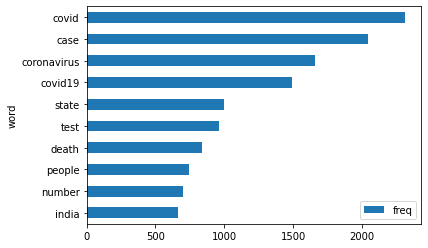

In [ ]:
p1.word_frequency(num = 10)

# Inspect Lengths of Tweets

In [ ]:
covid_tweet = pd.concat([covid_train.tweet, covid_valid.tweet ])
titles = [text for text in covid_tweet]

max_len = 0
tweet_len = []
for title in titles:
    tweet_len.append(len(title.split()))
    max_len = max(len(title.split()), max_len)

print('Number of tweets:', len(titles))
print('Max length of the tweets:', max_len)
print('Mean length of the tweets:', np.mean(tweet_len))

Number of tweets: 8560
Max length of the tweets: 1456
Mean length of the tweets: 26.947780373831776


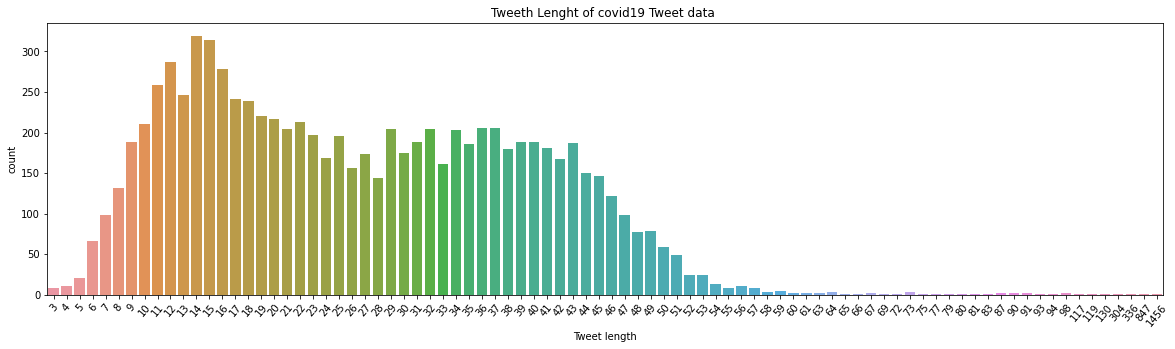

In [ ]:
plt.figure(figsize=(20,5))
g = sns.countplot(x=tweet_len)
g.set_xticklabels(g.get_xticklabels(), rotation=50)
g.set_xlabel('Tweet length')
g.set_title('Tweeth Lenght of covid19 Tweet data ')
plt.show()